#              Hilbert Transfrom

This code is related to the following section of [the paper](https://arxiv.org/abs/2403.17181):

## Section III:  SIGNAL TRANSFORMATION AND ANALYSIS
### E. Hilbert Transfrom

For more details please refer to [the paper](https://arxiv.org/abs/2403.17181).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import scipy
from scipy.signal import hilbert
plt.rc('font',family='Times New Roman')
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Create composite signal:

# Time vector
fs_compose = 500  # Sampling frequency
t_compose = np.linspace(0, 1, fs_compose, endpoint=False)  # 1 second

# Generate a signal with varying amplitude, phase, and frequency

amplitude =  1 + 0.5 * np.sin(2 * np.pi * 1 * t_compose)  # Varying amplitude
phase = np.pi * t_compose  # Varying phase
frequency = 5 + 3 * np.sin(2 * np.pi * 1 * t_compose)  # Varying frequency over time

# Modify frequency for sudden changes
frequency_mod = np.copy(frequency)
frequency_mod[int(fs_compose*0.3):int(fs_compose*0.5)] = 50  # Sudden jump to 50 Hz
frequency_mod[int(fs_compose*0.7):int(fs_compose*0.9)] = 100  # Another sudden jump to 100 Hz

# Introduce rapid and slow oscillations and abrupt phase changes
frequency_mod2 = np.copy(frequency_mod)
phase_mod = np.copy(phase)
phase_mod[int(fs_compose*0.4)]  += np.pi  # Abrupt phase change of 180 degrees
phase_mod[int(fs_compose*0.6)]+= np.pi /2 # Abrupt phase change of 90 degrees

# Generate the signal with the final modifications
sig_comp = amplitude * np.sin(2 * np.pi * frequency_mod2 * t_compose + phase_mod)

In [3]:
# Apply Hilbert transform
analytical_signal = hilbert(sig_comp)

#Instantaneous amplitude (Envelope):
instantaneous_amplitude = np.abs(analytical_signal)

#Instantaneous phase:
instantaneous_phase = np.unwrap(np.angle(analytical_signal))

#Instantaneous frequency:
instantaneous_frequency = np.abs( np.diff(instantaneous_phase) / (2.0*np.pi) * fs_compose   )

In [4]:
instantaneous_amplitude.shape

(500,)

In [5]:
instantaneous_phase.shape

(500,)

In [6]:
instantaneous_frequency.shape

(499,)

@@@@@@@@@@@@
### Note that the size of instantaneous_frequency is one sample less comapred to instantaneous_amplitude and instantaneous_phase due to diff operation.
@@@@@@@@@@@@

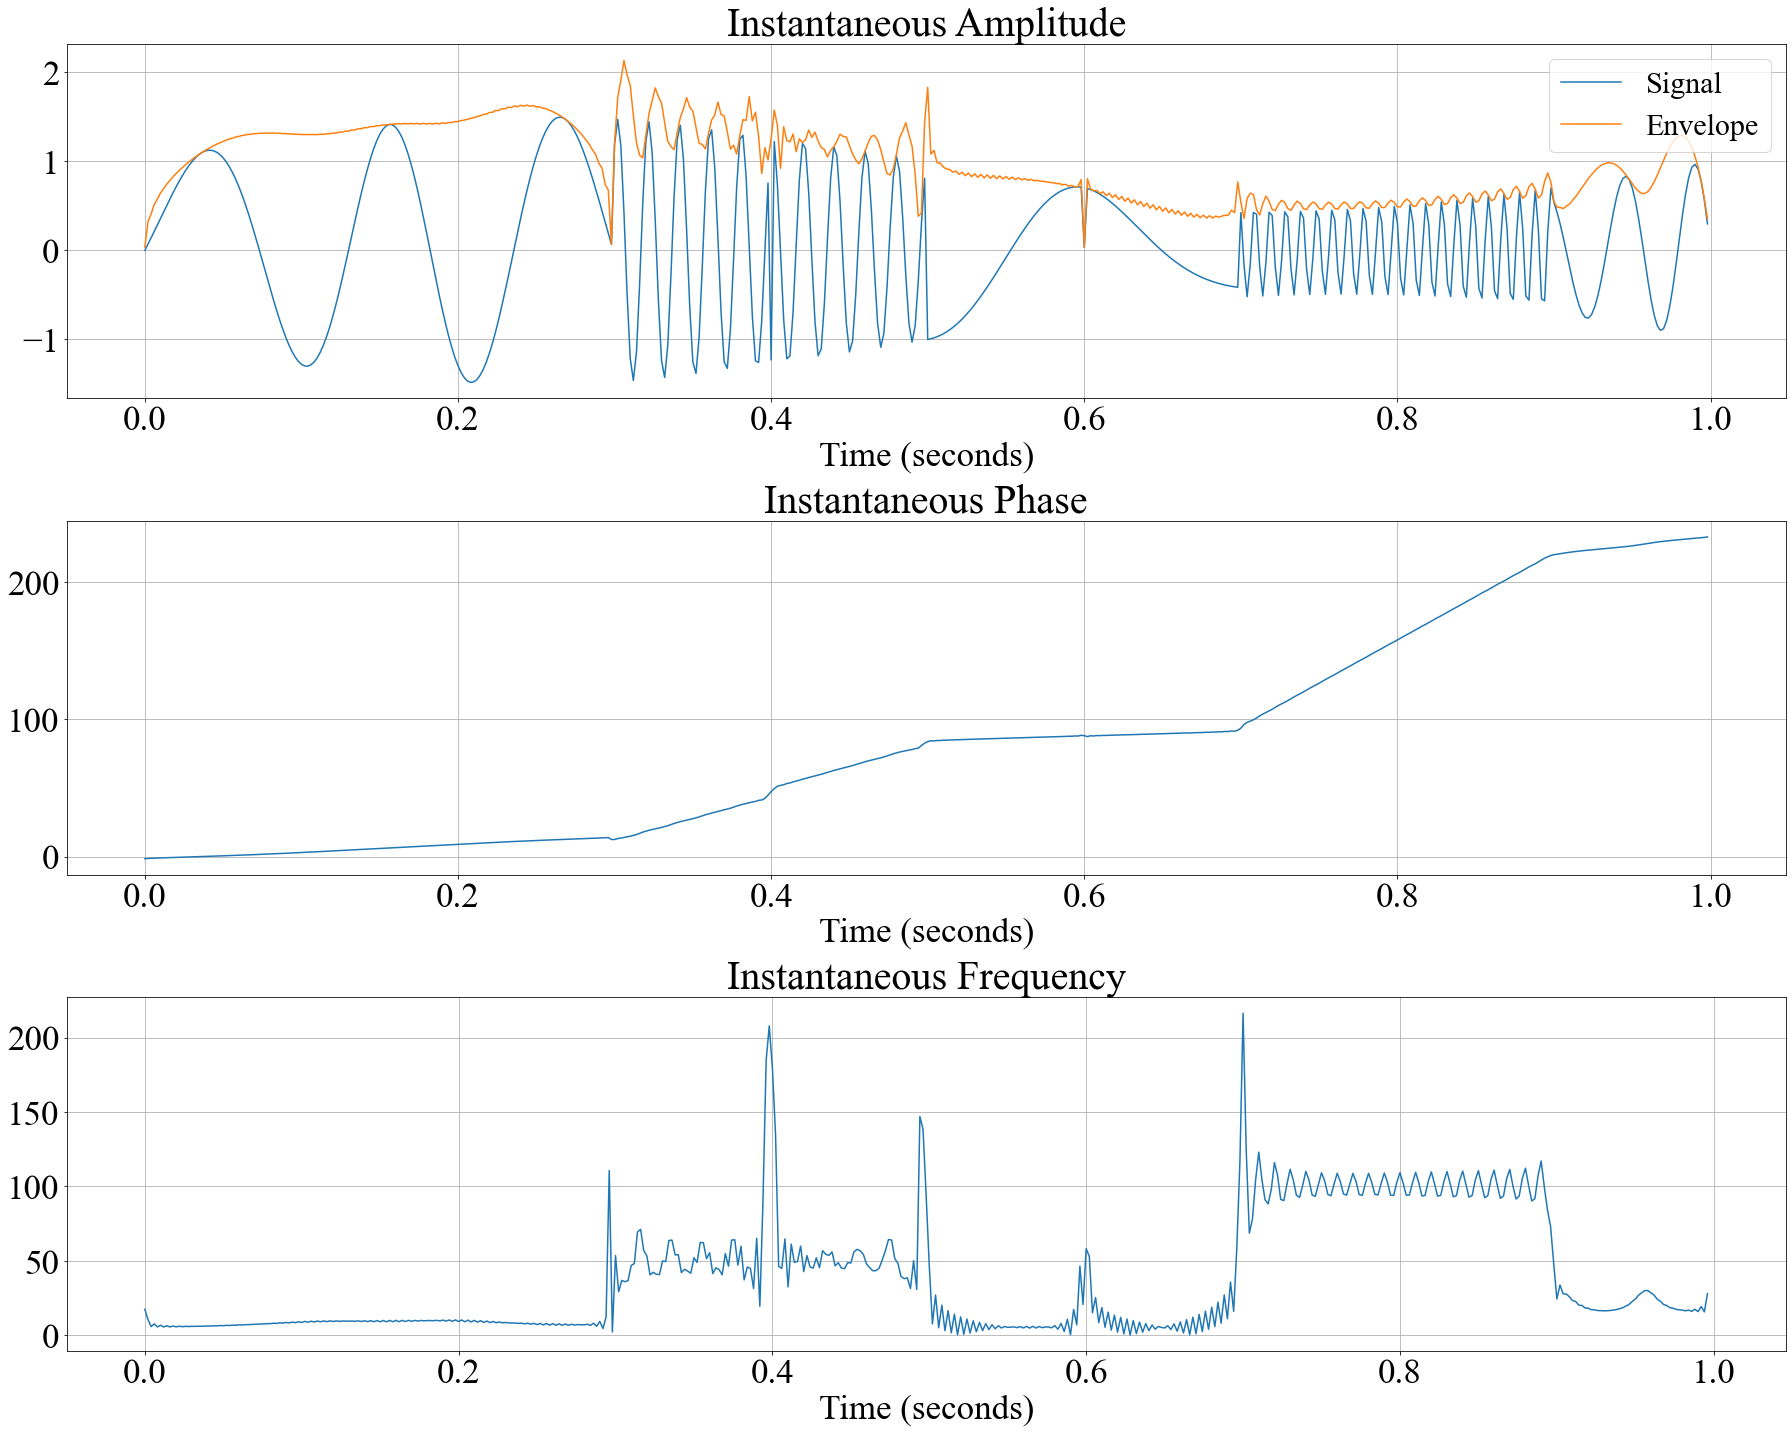

In [7]:
# Plotting
plt.figure(figsize=(25, 20))

plt.subplot(3, 1, 1)
plt.plot(t_compose, sig_comp,  label = 'Signal')
plt.plot(t_compose, instantaneous_amplitude, label = 'Envelope')
plt.title('Instantaneous Amplitude', fontsize = 40)
plt.xlabel('Time (seconds)', fontsize = 35) 
plt.tick_params(axis= 'both', which='both', labelsize=35)  
#plt.yticks([])  
plt.legend(fontsize=30, loc = 1)
plt.grid(True)


plt.subplot(3, 1, 2)
plt.plot(t_compose, instantaneous_phase)
plt.title('Instantaneous Phase', fontsize = 40)
plt.xlabel('Time (seconds)', fontsize = 35) 
plt.tick_params(axis= 'both', which='both', labelsize=35)  
#plt.yticks([])  
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(t_compose[:-1], instantaneous_frequency)  # One sample less due to diff operation
plt.title('Instantaneous Frequency', fontsize = 40)
plt.xlabel('Time (seconds)', fontsize = 35) 
plt.tick_params(axis= 'both', which='both', labelsize=35)  
plt.grid(True)

plt.tight_layout()
plt.show()